In [1]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns = ['CustomerID', 'Gender', 'Age', 'Annual Income','Spending Score']
df = pd.read_csv("Mall_Customers.csv")
df.columns = columns
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df["Gender"] = df.Gender.apply(lambda x: 0 if x == "Male" else 1)

In [4]:
clustering = DBSCAN(eps=18, min_samples=7)
clustering.fit(df)
clusters = clustering.labels_
print(np.unique(clusters))

[-1  0  1  2  3  4  5]


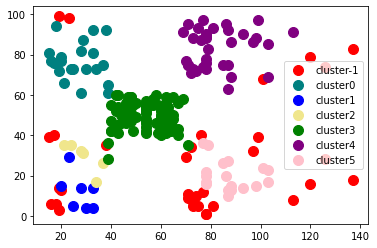

In [5]:
colors = ["red","teal","blue","khaki","green","purple","pink","lime","black","yellow","cyan","brown","orange","violet"]

for i in np.unique(clusters):
    plt.scatter(df.iloc[clusters == i, 3], df.iloc[clusters == i, 4], s = 100, c = colors[i+1], label = 'cluster{}'.format(i))
plt.legend()

In [6]:
neigh = NearestNeighbors(n_neighbors=7, radius = 4)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

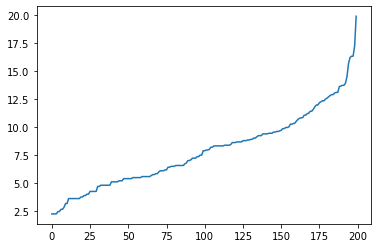

In [7]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [8]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import euclidean_distances
from math import ceil
import numpy as np
import time


def betacv_simple(data, labels, size=3000, metric='euclidean'):
    n = labels.shape[0]
    n_slices = ceil(n/size)
    intra = 0
    inter = 0
    n_in = 0
    n_out = 0
    last = 0
    labels_unq = np.unique(labels)
    members = np.array([member_count(labels, i) for i in labels_unq])
    N_in = np.array([i*(i-1) for i in members])
    n_in = np.sum(N_in)
    N_out = np.array([i*(n-i) for i in members])
    n_out = np.sum(N_out)
    
    for i in range(n_slices):
        x = data[last:(last+size), :]
        distances = euclidean_distances(x, data)
        j_range = min(size, n-size*i)
        A = np.array([intra_cluster_distance(distances[j], labels, j+last)
                  for j in range(j_range)])
        B = np.array([inter_cluster_distance(distances[j], labels, j+last)
                  for j in range(j_range)])
        intra += np.sum(A)
        inter += np.sum(B)
        last += size

    betacv = (intra/n_in)/(inter/n_out)
    print('simple intra:', intra)
    print('simple inter:', inter)
    print('simple n_in :', n_in)
    print('simple n_out:', n_out)
    return betacv

def betacv(data, labels, metric='euclidean'):
    distances = pairwise_distances(data, metric=metric)
    n = labels.shape[0]
    A = np.array([intra_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    B = np.array([inter_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    a = np.sum(A)
    b = np.sum(B)
    labels_unq = np.unique(labels)
    members = np.array([member_count(labels, i) for i in labels_unq])
    N_in = np.array([i*(i-1) for i in members])
    n_in = np.sum(N_in)
    N_out = np.array([i*(n-i) for i in members])
    n_out = np.sum(N_out)
    betacv = (a/n_in)/(b/n_out)
    print('intra:', a)
    print('inter:', b)
    print('n_in :', n_in)
    print('n_out:', n_out)
    return betacv

def intra_cluster_distance(distances_row, labels, i):
    mask = labels == labels[i]
    mask[i] = False
    if not np.any(mask):
        # cluster of size 1
        return 0
    a = np.sum(distances_row[mask])
    return a

def inter_cluster_distance(distances_row, labels, i):
    mask = labels != labels[i]
    b = np.sum(distances_row[mask])
    return b

def member_count(labels, i):
    mask = labels == i
    return len(labels[mask])

In [9]:
betacv(df,clusters)

intra: 421518.5842341928
inter: 3036983.9735263074
n_in : 9364
n_out: 30436


0.45112863785361307